# Simulating Super Fluid Dark Matter

## Question
Modify and/or use the already existing functionality of PyAutoLens to simulate strong lensing from superfluid dark matter. Specifically, you will need to simulate the effects of lensing from a linear mass density - imagine this being a string of mass on galactic scales.

# Theory

## About Dark Matter 

## Dark Matter and Strong Lensing

## About superfluid dark matter

Yet to fill this section

# Simulation

In [ ]:
# Installing the package
!pip install autolens

In [ ]:
# Imports
import autolens as al
import autolens.plot as aplt

In [ ]:
# Creating the grid 2D for tracing images
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05, sub_size=2)

Creating the Source galaxy and the Lens Galaxy according to the papers

1. [Decoding Dark Matter Substructure without Supervision](https://arxiv.org/abs/2008.12731)

2. [Deep Learning the Morphology of Dark Matter Substructure](https://arxiv.org/abs/1909.07346)




## Source Galaxy

In [ ]:
# Creating the light profile of the source galaxy
light_profile=al.lp.EllipticalSersic(
                    centre=(0.5, 0.5),
                    elliptical_comps = al.convert.elliptical_comps_from(axis_ratio=0.85, phi=90.0),
                    intensity=0.7,
                    sersic_index=1.5,
                    effective_radius=0.5   
                ) 

In [ ]:
# Creating the galaxy from the light profile
source_galaxy = al.Galaxy(
                redshift=1,
                light_profile=light_profile
            )

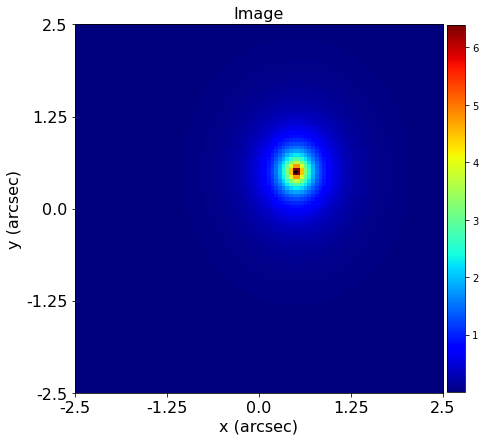

In [ ]:
# Visualizing the source galaxy
galaxy_plotter = aplt.GalaxyPlotter(galaxy=source_galaxy, grid=grid)
galaxy_plotter.figures(image=True)

## Lens Galaxy

### Vortex Substructure

In [ ]:
# Deviating slightly from the paper here, as the paper included that this number should be drawn from poisson distribution with mean 25
num_of_subhalos = 30

# Length of the vortex substructure (which is a superfluid string of mass)
vortex_len = 1

In [ ]:
# The dark matter halo which this vortex is a part of, as given in the paper
mass_profile_dark_matter_halo = al.mp.SphericalIsothermal(centre=(0, 0), einstein_radius=1.2)

In [ ]:
# Vortex mass is a fraction of the original halos mass
vortex_mass = 0.02
einstein_rad_parent_halo = 1.2

In [ ]:
point_mass_subhalo_profiles = {}

# The key idea lies here, as mentioned in the paper, each subhalo can be approximated to a point mass, and hence to create a linear mass density,  
# I am simply arranging these point masses in a straight line which ultimately forms a linear mass density.


# Creating point masses and arranging them in a diagonal, by giving same y,x co-ordinates.
for i in range(num_of_subhalos):
  point_mass_subhalo_profiles['mass_profile' + str(i)] = al.mp.PointMass(centre=(vortex_len/num_of_subhalos * i , vortex_len/num_of_subhalos * i), einstein_radius=0.02**0.5 * 1.2)

# One of the assumptions that i have made is that the einstein radius of the vertex, will depened only on its mass because its a part of a bigger halo already. So I have used the proportionality on mass to calculate the einstein radius of the vortex


In [ ]:
# Creating the lens galaxy using the collection of point masses as its mass profiles
lens_galaxy = al.Galaxy(
                redshift=0.5,
                **dict(point_mass_subhalo_profiles)
            )

In [ ]:
 # Visualizing the simulations using tracer
 tracer = al.Tracer.from_galaxies([lens_galaxy, source_galaxy])

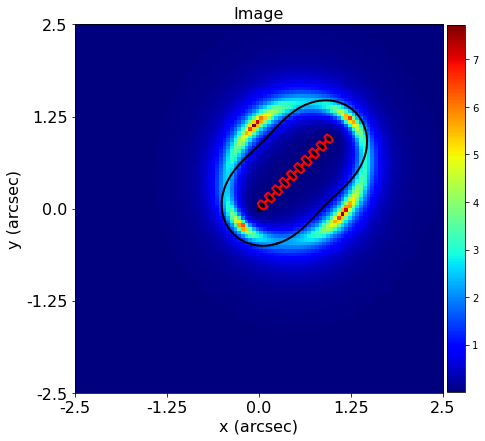

In [ ]:
tracerPlotter = aplt.TracerPlotter(tracer=tracer, grid=grid)
tracerPlotter.figures(image=True)

In [ ]:
# Simulating the telescope Image
psf = al.Kernel2D.from_gaussian(
    shape_native=(9, 9), sigma=0.8, pixel_scales=grid.pixel_scales
)

simulator = al.SimulatorImaging(
    exposure_time=200.0,
    background_sky_level=0.1,
    psf=psf,
    add_poisson_noise=True,
)

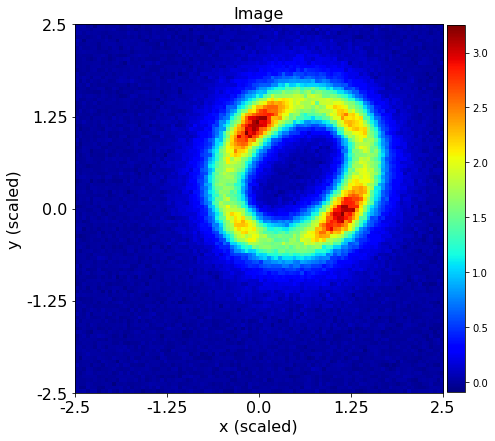

In [ ]:
imaging = simulator.from_tracer_and_grid(tracer=tracer, grid=grid)
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(image=True)

# References

1. [Decoding Dark Matter Substructure without Supervision](https://arxiv.org/abs/2008.12731)

2. [Deep Learning the Morphology of Dark Matter Substructure](https://arxiv.org/abs/1909.07346)

3. [PyAutoLens Workspace](https://github.com/Jammy2211/autolens_workspace)

4. [About Dark Matter Halos](https://en.wikipedia.org/wiki/Dark_matter_halo)

5. ["Decoding Dark Matter Substructure without Supervision" Michael Toomey (Brown) - CFPU SMLI](https://www.youtube.com/watch?v=EevKPxUzfxI&t=584s&ab_channel=BrownUniversityDepartmentofPhysics)

6. [What is dark matter made of? Leading theories explained: Axion, Wimp, Machos](https://www.youtube.com/watch?v=915Vky7r_gk&ab_channel=ArvinAsh)

7. [BTPC IDEA Series "Decoding Dark Matter Substructure without Supervision" Michael Toomey (Brown)](https://www.youtube.com/watch?v=NwLuXyRon3w&ab_channel=BrownUniversityDepartmentofPhysics)

8. [Introduction to Gravitational Lensing](https://www.ita.uni-heidelberg.de/~jmerten/misc/meneghetti_lensing.pdf)